In [1]:
import glob

input_data = sorted(glob.glob('*/G*/*'))
output_data = sorted(glob.glob('*/M*/*'))

In [109]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,UpSampling2D, Input

from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()

def get_value(s):
    return float(s[s.find("(")+1:s.find(")")])
    
def get_list_from_string(L):
    return map(get_value, L.split('/')[-1].split('_')[-3:])
    

print np.array(map(get_list_from_string,input_data))
print
print np.array(map(get_list_from_string,output_data))



np.loadtxt(input_data[0], delimiter=',')

X = np.array(map(lambda x: np.loadtxt(x, delimiter=','), input_data[500:800]))
y_temp = np.array(map(lambda x: np.loadtxt(x, delimiter=','), output_data[500:800]))

print X.shape
print y_temp.shape

[[  10.  -10.  -10.]
 [  10.  -10. -100.]
 [  10.  -10. -110.]
 ...
 [  65.  -40.  -10.]
 [  65.  -40.  -20.]
 [  65.  -40.  -30.]]

[[  10.  -10.  -10.]
 [  10.  -10. -100.]
 [  10.  -10. -110.]
 ...
 [  65.  -40.  -10.]
 [  65.  -40.  -20.]
 [  65.  -40.  -30.]]
(300, 128, 128)
(300, 384, 128)


In [110]:
X = X.reshape(-1,128,128,1)
y = y_temp.reshape(y_temp.shape[0],3,128,128)
y = np.transpose(y, (0,2,3,1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

print X.shape
print y.shape



(300, 128, 128, 1)
(300, 128, 128, 3)


In [119]:
model = Sequential()
model.add(Conv2D(3, (3, 3), padding='same',input_shape=(128,128,1)))
model.add(Activation('relu'))

# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))

# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))

# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))

# model.add(Conv2D(64, (3, 3),padding='same'))
# model.add(Activation('relu'))

model.add(Conv2D(3, (3, 3),padding='same'))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['mse','accuracy'])

history = model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test)
         )

Train on 201 samples, validate on 99 samples
Epoch 1/100
201/201 [==============================] - 4s 22ms/step - loss: 0.7005 - mean_squared_error: 0.2823 - acc: 0.8996 - val_loss: 0.6945 - val_mean_squared_error: 0.2733 - val_acc: 0.8977
Epoch 2/100
201/201 [==============================] - 4s 18ms/step - loss: 0.6914 - mean_squared_error: 0.2778 - acc: 0.9015 - val_loss: 0.6851 - val_mean_squared_error: 0.2686 - val_acc: 0.8991
Epoch 3/100
201/201 [==============================] - 4s 18ms/step - loss: 0.6806 - mean_squared_error: 0.2724 - acc: 0.9029 - val_loss: 0.6715 - val_mean_squared_error: 0.2620 - val_acc: 0.9008
Epoch 4/100
201/201 [==============================] - 3s 17ms/step - loss: 0.6630 - mean_squared_error: 0.2637 - acc: 0.9050 - val_loss: 0.6455 - val_mean_squared_error: 0.2490 - val_acc: 0.9035
Epoch 5/100
201/201 [==============================] - 3s 17ms/step - loss: 0.6245 - mean_squared_error: 0.2445 - acc: 0.9148 - val_loss: 0.5798 - val_mean_squared_error: 

201/201 [==============================] - 4s 18ms/step - loss: 0.0147 - mean_squared_error: 0.0310 - acc: 0.9233 - val_loss: 0.0405 - val_mean_squared_error: 0.0317 - val_acc: 0.9214
Epoch 43/100
201/201 [==============================] - 4s 18ms/step - loss: 0.0145 - mean_squared_error: 0.0310 - acc: 0.9233 - val_loss: 0.0395 - val_mean_squared_error: 0.0316 - val_acc: 0.9214
Epoch 44/100
201/201 [==============================] - 3s 17ms/step - loss: 0.0143 - mean_squared_error: 0.0310 - acc: 0.9233 - val_loss: 0.0392 - val_mean_squared_error: 0.0316 - val_acc: 0.9214
Epoch 45/100
201/201 [==============================] - 4s 17ms/step - loss: 0.0143 - mean_squared_error: 0.0310 - acc: 0.9233 - val_loss: 0.0386 - val_mean_squared_error: 0.0316 - val_acc: 0.9214
Epoch 46/100
201/201 [==============================] - 4s 18ms/step - loss: 0.0142 - mean_squared_error: 0.0310 - acc: 0.9233 - val_loss: 0.0392 - val_mean_squared_error: 0.0316 - val_acc: 0.9214
Epoch 47/100
201/201 [======

Epoch 84/100
201/201 [==============================] - 4s 18ms/step - loss: 0.0115 - mean_squared_error: 0.0309 - acc: 0.9233 - val_loss: 0.0353 - val_mean_squared_error: 0.0314 - val_acc: 0.9214
Epoch 85/100
201/201 [==============================] - 4s 18ms/step - loss: 0.0115 - mean_squared_error: 0.0309 - acc: 0.9233 - val_loss: 0.0356 - val_mean_squared_error: 0.0315 - val_acc: 0.9214
Epoch 86/100
201/201 [==============================] - 4s 21ms/step - loss: 0.0114 - mean_squared_error: 0.0309 - acc: 0.9233 - val_loss: 0.0349 - val_mean_squared_error: 0.0314 - val_acc: 0.9214
Epoch 87/100
201/201 [==============================] - 4s 20ms/step - loss: 0.0114 - mean_squared_error: 0.0309 - acc: 0.9233 - val_loss: 0.0341 - val_mean_squared_error: 0.0313 - val_acc: 0.9214
Epoch 88/100
201/201 [==============================] - 4s 19ms/step - loss: 0.0114 - mean_squared_error: 0.0309 - acc: 0.9233 - val_loss: 0.0341 - val_mean_squared_error: 0.0313 - val_acc: 0.9214
Epoch 89/100
20

In [120]:
metrics = dict(history.history.items())

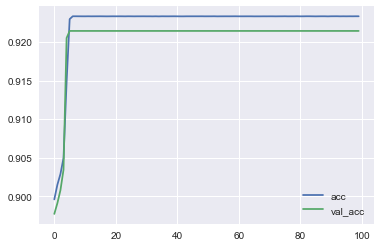

In [121]:
pd.DataFrame(metrics).iloc[:,0::3].plot()

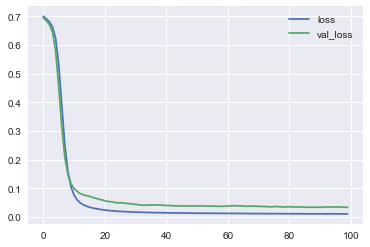

In [122]:
pd.DataFrame(metrics).iloc[:,1::3].plot()

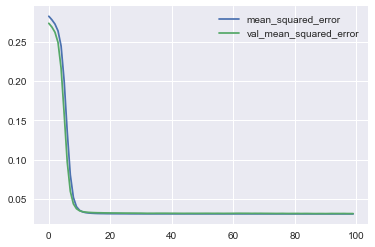

In [123]:
pd.DataFrame(metrics).iloc[:,2::3].plot()

In [124]:
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 128, 128, 3)       30        
_________________________________________________________________
activation_19 (Activation)   (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 128, 128, 3)       84        
_________________________________________________________________
activation_20 (Activation)   (None, 128, 128, 3)       0         
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


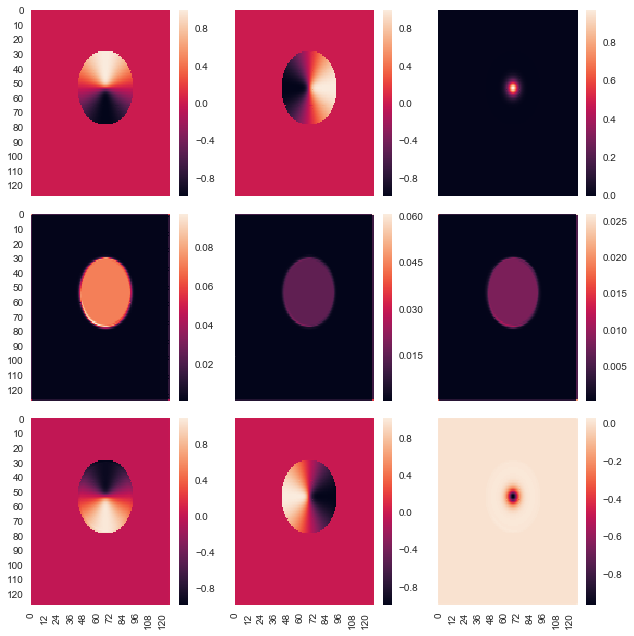

In [125]:
checkInput = y[150]

fig, ax = plt.subplots(3,3,figsize=(9,9),sharey=True, sharex=True)

sns.heatmap(np.transpose(checkInput, (2,0,1))[0], ax=ax[0,0])
sns.heatmap(np.transpose(checkInput, (2,0,1))[1], ax=ax[0,1])
sns.heatmap(np.transpose(checkInput, (2,0,1))[2], ax=ax[0,2])

checkX = X[150]

checkY = model.predict(checkX[np.newaxis,:])[0]

sns.heatmap(np.transpose(checkY, (2,0,1))[0], ax=ax[1,0])
sns.heatmap(np.transpose(checkY, (2,0,1))[1], ax=ax[1,1])
sns.heatmap(np.transpose(checkY, (2,0,1))[2], ax=ax[1,2])

checkDiff = checkY-checkInput

sns.heatmap(np.transpose(checkDiff, (2,0,1))[0], ax=ax[2,0])
sns.heatmap(np.transpose(checkDiff, (2,0,1))[1], ax=ax[2,1])
sns.heatmap(np.transpose(checkDiff, (2,0,1))[2], ax=ax[2,2])

plt.tight_layout()
plt.show()